In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('loan_data.csv')
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y
476,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
398,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
392,LP002263,Male,Yes,0,Graduate,No,2583,2115.0,120.0,360.0,NaN,Urban,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
47,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
344,LP002128,Male,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural,Y
281,LP001914,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban,Y
399,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
cat_df = df.select_dtypes(include='object')
cat_na_cols = cat_df.columns[cat_df.isna().any()]
cat_na_cols

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [ ]:
num_df = df.select_dtypes(include=['int', 'float'])
num_na_cols = num_df.columns[num_df.isna().any()]
num_na_cols

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')

In [ ]:
for col in cat_na_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-4192686505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
for col in num_na_cols:
  df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-3762034256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

preprocesser = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols),
        ('num', MinMaxScaler(), num_cols)
    ],
    remainder='passthrough'
)

processed = preprocesser.fit_transform(df)
df2 = pd.DataFrame(processed, columns=preprocesser.get_feature_names_out())
df2.head()

,cat__Gender_Male,cat__Married_Yes,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Education_Not Graduate,cat__Self_Employed_Yes,cat__Property_Area_Semiurban,cat__Property_Area_Urban,cat__Loan_Status_Y,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.070489,0.000000,0.198860,0.74359,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.030093,0.056592,0.160637,0.74359,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.072356,0.000000,0.191027,0.74359,1.0


In [ ]:
df2.isna().sum()

,0
cat__Gender_Male,0
cat__Married_Yes,0
cat__Dependents_1,0
cat__Dependents_2,0
cat__Dependents_3+,0
cat__Education_Not Graduate,0
cat__Self_Employed_Yes,0
cat__Property_Area_Semiurban,0
cat__Property_Area_Urban,0
cat__Loan_Status_Y,0


In [ ]:
df2.dtypes

,0
cat__Gender_Male,float64
cat__Married_Yes,float64
cat__Dependents_1,float64
cat__Dependents_2,float64
cat__Dependents_3+,float64
cat__Education_Not Graduate,float64
cat__Self_Employed_Yes,float64
cat__Property_Area_Semiurban,float64
cat__Property_Area_Urban,float64
cat__Loan_Status_Y,float64


In [ ]:
X = df2.drop('cat__Loan_Status_Y', axis=1)
y = df2['cat__Loan_Status_Y']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [ ]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((491, 14), (123, 14), (491,), (123,))

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
X.shape

(614, 14)

In [ ]:
input_neurons = X.shape[1]
output_neurons = 1
no_of_hidden_layers = 2
hidden_layer_neurons_1 = 10
hidden_layer_neurons_2 = 5

In [ ]:
model = Sequential()
model.add(InputLayer(shape=(input_neurons,)))
model.add(Dense(units=hidden_layer_neurons_1, activation='relu'))
model.add(Dense(units=hidden_layer_neurons_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3180 - loss: 0.9554 - val_accuracy: 0.3089 - val_loss: 0.8735
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3214 - loss: 0.8563 - val_accuracy: 0.3089 - val_loss: 0.7940
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2928 - loss: 0.7948 - val_accuracy: 0.3089 - val_loss: 0.7443
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3144 - loss: 0.7460 - val_accuracy: 0.3089 - val_loss: 0.7148
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2989 - loss: 0.7171 - val_accuracy: 0.4472 - val_loss: 0.6984
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4855 - loss: 0.6980 - val_accuracy: 0.6179 - val_loss: 0.6882
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5856 - loss: 0.6883 - val_accuracy: 0.6748 - val_loss: 0.6802
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6060 - loss: 0.6823 - val_accuracy: 0.6911 - 

In [ ]:
y_test

,cat__Loan_Status_Y
150,0.0
559,1.0
598,1.0
235,1.0
145,1.0
...,...
363,1.0
280,0.0
7,0.0
289,1.0


In [ ]:
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.0357242 ],
       [0.731474  ],
       [0.6449363 ],
       [0.6205827 ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.64909506],
       [0.7279301 ],
       [0.731474  ],
       [0.731474  ],
       [0.7250325 ],
       [0.731474  ],
       [0.07738976],
       [0.06330806],
       [0.6818461 ],
       [0.21754627],
       [0.22434653],
       [0.731474  ],
       [0.18359502],
       [0.6354367 ],
       [0.6562707 ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.0601283 ],
       [0.71133065],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.67600065],
       [0.6594687 ],
       [0.731474  ],
       [0.03642303],
       [0.731474  ],
       [0.7068215 ],
       [0.731474  ],
       [0.731474  ],
       [0.7269707 ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.731474  ],
       [0.708

In [ ]:
prediction = (model.predict(X_test) >= 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, prediction)

In [ ]:
accuracy_score(y_test, prediction)

0.8536585365853658

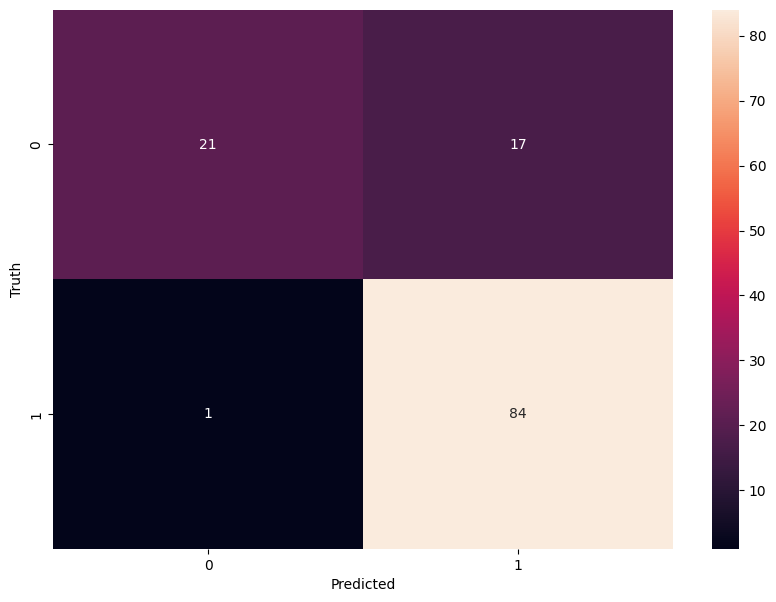

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



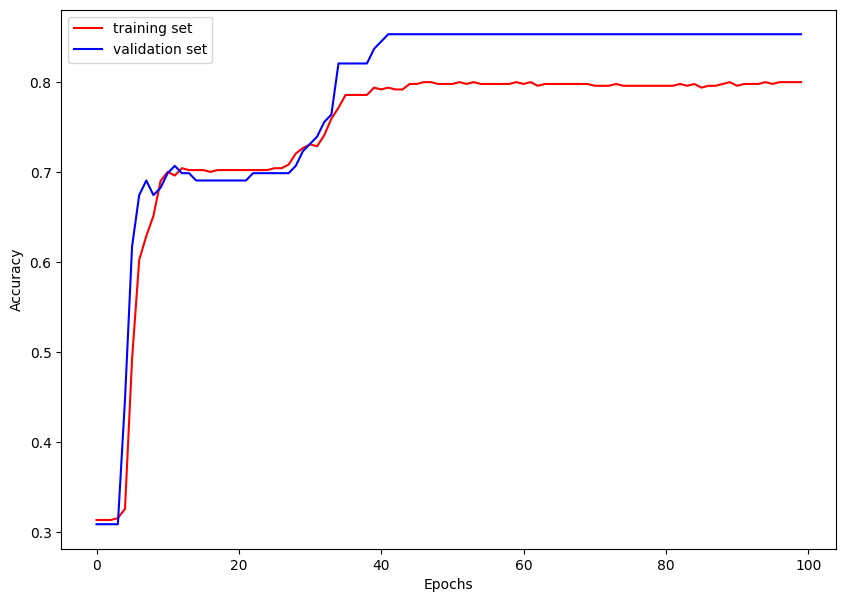

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['accuracy'], color='red', label='training set')
plt.plot(model_history.history['val_accuracy'], color='blue', label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

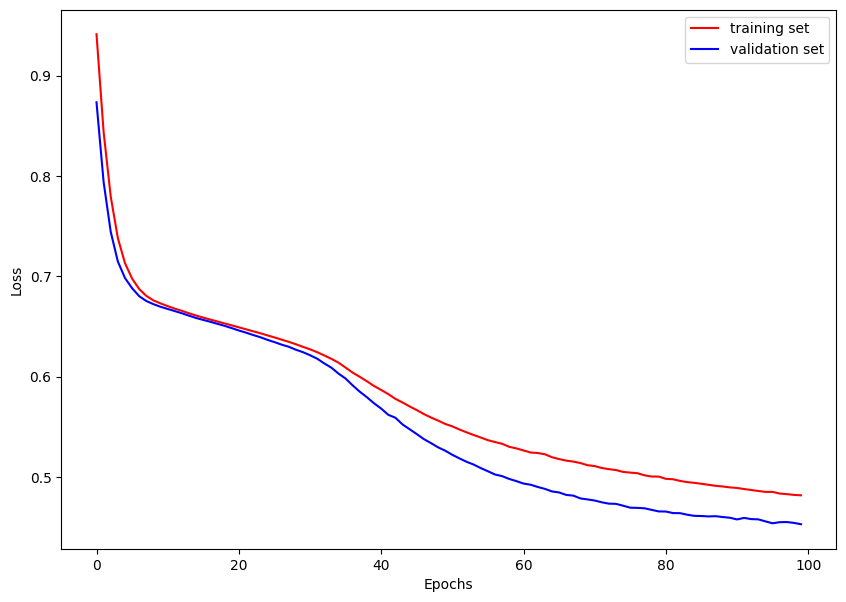

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['loss'], color='red', label='training set')
plt.plot(model_history.history['val_loss'], color='blue', label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()